In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

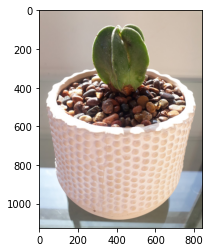

In [ ]:
img_0 = Image.open('/content/drive/MyDrive/Modelo C y S/Train/0/10.jpg')
plt.imshow(img_0)

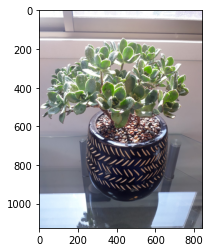

In [ ]:
img_1 = Image.open('/content/drive/MyDrive/Modelo C y S/Train/1/26.jpg')
plt.imshow(img_1)

In [ ]:
TARGET_SIZE = (224, 224)
BATCH_SIZE = 2
CLASSES = ['0', '1']
RANDOM_SEED = 0

In [ ]:
train_data_dir = '/content/drive/MyDrive/Modelo C y S/Train'

In [ ]:
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=TARGET_SIZE
                                                           , batch_size=BATCH_SIZE
                                                           , classes=CLASSES
                                                           , seed=RANDOM_SEED
                                                           , shuffle=True)

Found 26 images belonging to 2 classes.


In [ ]:
validation_data_dir = '/content/drive/MyDrive/Modelo C y S/Valid'

In [ ]:
valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=TARGET_SIZE
                                                           , batch_size=BATCH_SIZE
                                                           , classes=CLASSES
                                                           , seed=RANDOM_SEED
                                                           , shuffle=True)

Found 26 images belonging to 2 classes.


In [ ]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable= False

In [ ]:
sec_last_model = model.layers[-2].output
connected_model = Dense(len(CLASSES), activation = 'softmax')(sec_last_model)
model_input = model.input
model = Model(inputs = model.input, outputs = connected_model)

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
N_EPOCHES = 10
STEPS = train_generator.n // train_generator.batch_size
model.fit_generator(generator = train_generator, validation_data = valid_generator, steps_per_epoch = STEPS, epochs = N_EPOCHES)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
13/13 [==============================] - 37s 3s/step - loss: 1.1543 - accuracy: 0.4102 - val_loss: 0.7307 - val_accuracy: 0.5385
Epoch 2/10
13/13 [==============================] - 9s 749ms/step - loss: 0.5951 - accuracy: 0.7179 - val_loss: 0.6436 - val_accuracy: 0.6923
Epoch 3/10
13/13 [==============================] - 9s 752ms/step - loss: 0.2207 - accuracy: 1.0000 - val_loss: 0.4403 - val_accuracy: 0.8462
Epoch 4/10
13/13 [==============================] - 9s 746ms/step - loss: 0.1602 - accuracy: 0.9194 - val_loss: 0.4129 - val_accuracy: 0.8846
Epoch 5/10
13/13 [==============================] - 9s 751ms/step - loss: 0.0751 - accuracy: 1.0000 - val_loss: 0.3983 - val_accuracy: 0.8846
Epoch 6/10
13/13 [==============================] - 9s 755ms/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.3963 - val_accuracy: 0.8846
Epoch 7/10
13/13 [==============================] - 9s 747ms/step - loss: 0.0552 - accuracy: 1.0000 - val_loss: 0.3914 - val_accuracy: 0.8846
Epoch 8/

In [ ]:
train_history = model.history.history

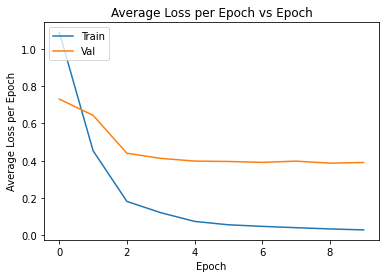

In [ ]:
plt.plot(train_history['loss'])
plt.plot(train_history['val_loss'])
plt.title('Average Loss per Epoch vs Epoch')
plt.ylabel('Average Loss per Epoch')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

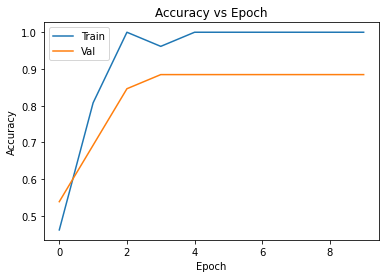

In [ ]:
plt.plot(train_history['accuracy'])
plt.plot(train_history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()